In [32]:
from keras.datasets import mnist
import keras
import keras.layers
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [46]:
X_test.shape

(10000, 28, 28, 1)

In [36]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2248 - accuracy: 0.9293
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0794 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0568 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0363 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0204 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 56s 30m

In [38]:
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0544 - accuracy: 0.9847


[0.054428935050964355, 0.9847000241279602]

In [39]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [44]:
y_predicted_by_model[0]

array([6.3542966e-09, 1.1315673e-05, 1.4644036e-06, 1.0038907e-05,
       3.2652116e-07, 2.0580100e-09, 2.2280387e-12, 9.9997658e-01,
       2.2560704e-08, 2.6170687e-07], dtype=float32)

In [45]:
import numpy as np
np.argmax(y_predicted_by_model[0])

7

In [47]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-11 11:26:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  21.8MB/s    in 3.0s    

2023-04-11 11:26:24 (21.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [48]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [49]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [50]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.979.jpg', 'cat.637.jpg', 'cat.406.jpg', 'cat.740.jpg', 'cat.129.jpg', 'cat.552.jpg', 'cat.192.jpg', 'cat.404.jpg', 'cat.498.jpg', 'cat.779.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [51]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

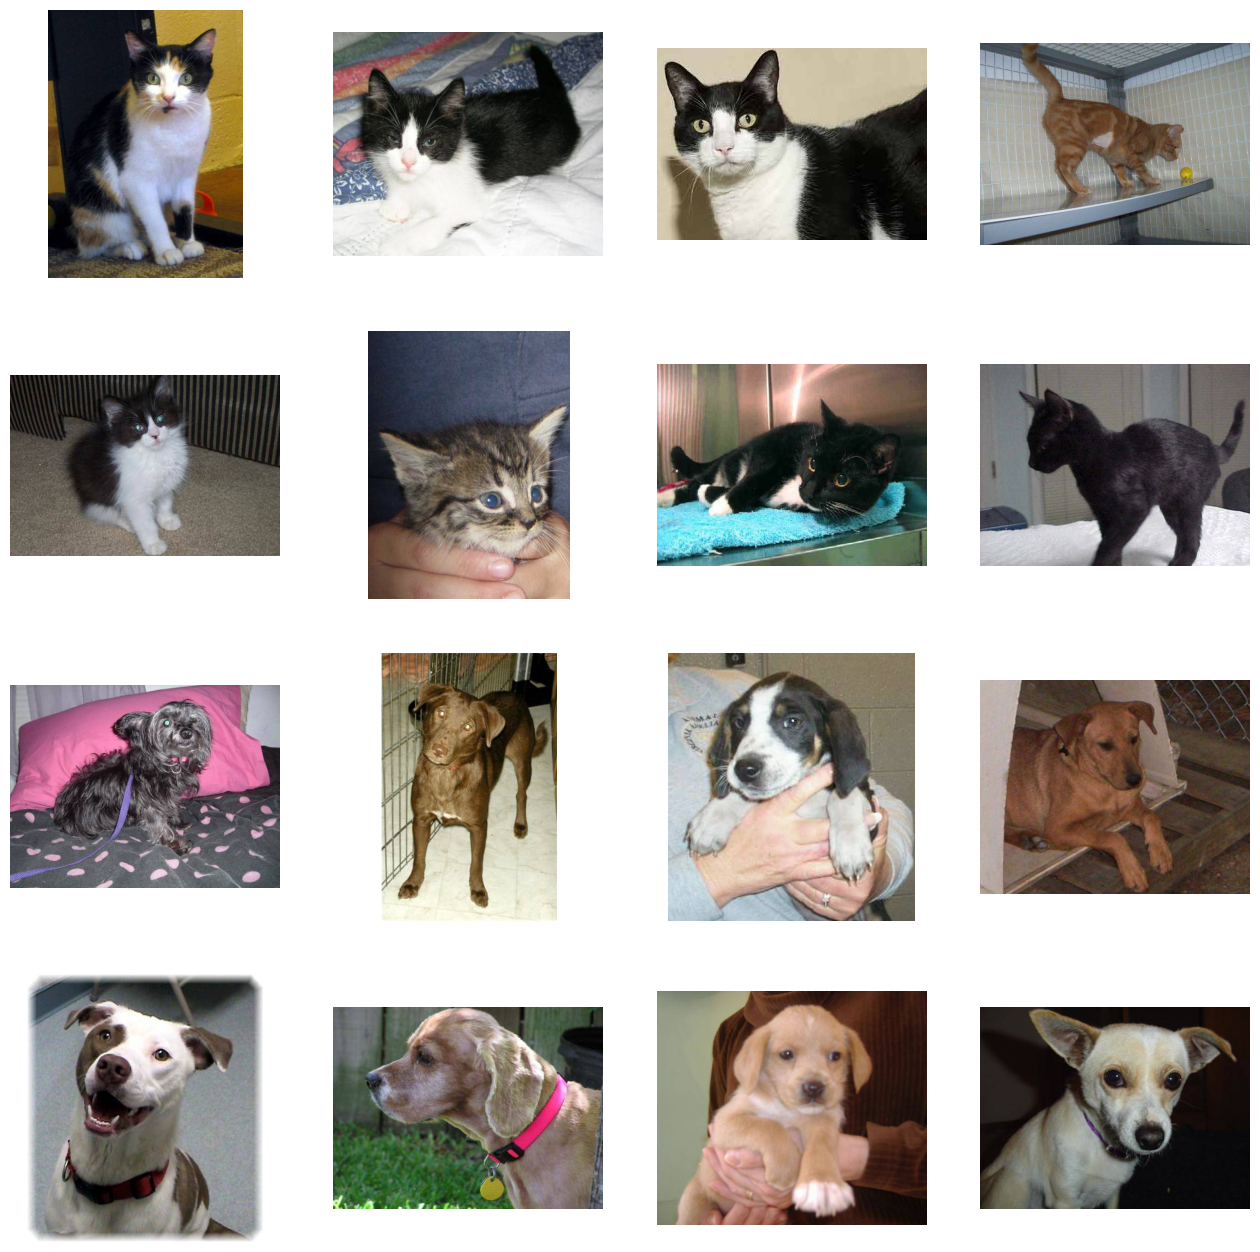

In [53]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
